## Игра «Крестики-нолики».

## Исходный проект: [GitHub](https://github.com/nczempin/gym-tic-tac-toe).

### Описание проекта:

Проект представляет собой реализацию среды для игры в крестики-нолики с использованием библиотеки Gymnasium и модель обучения, в которой два случайно действующих игрока соревнуются в течение множества эпизодов.

**Проект состоит из следующих компонентов:**
1. **Среда TicTacToeEnv:**<br>
   Реализует правила игры в крестики-нолики, управление ходами, проверку победных условий и завершения игры. Обеспечивает визуализацию доски (render) и генерацию доступных ходов.
2. **Игроки:**<br>
   Два случайных игрока, каждый из которых выбирает ход из доступных с помощью функции random_move.
3. **Цикл обучения:**<br>
   Выполняется симуляция игр (эпизодов) между игроками. Учитываются награды, проверяются завершения игр и ведётся статистика (например, средняя награда).
4. **Параметры обучения:**<br>
   Задаются переменные (alpha, beta) для возможной адаптации стратегий, хотя в текущей версии они не используются.
5. **Сбор данных:**<br>
   Коллекционируются награды и результаты эпизодов для анализа и оценки эффективности случайных стратегий. 

---

### Бизнес-цель:
Разработка платформы для исследования и оптимизации стратегий игры, которая может быть использована в обучении, автоматизации решений, создании игровых приложений или демонстрации алгоритмов искусственного интеллекта.

---

### Технические цели:
1. Разработать гибкую и расширяемую среду для симуляции игры в крестики-нолики, которая будет легко интегрироваться с различными алгоритмами искусственного интеллекта (AI), включая классические методы обучения с подкреплением, такие как Q-learning.
2. Реализовать и оптимизировать алгоритмы обучения с подкреплением для создания агентов, которые могут адаптироваться и улучшать свои стратегии с течением времени. Это включает внедрение таких методов, как Q-learning, для оптимизации принятия решений агентами.
3. Оценить эффективность различных стратегий, путем обучения агентов с различными параметрами, такими как коэффициенты обучения и коэффициенты дисконтирования, и выявить наилучшие подходы для разных игровых ситуаций.
4. Разработать механизмы автоматизированного тестирования и оптимизации стратегий игры. Это включает реализацию автоматической генерации и оценки множества стратегий с использованием методов оптимизации и обучения с подкреплением.
5. Встроить функционал для сравнения различных стратегий по меткам, таким как количество побед, ничьих и полученные награды, что будет полезно для исследований и разработки более эффективных игровых стратегий.
6. Реализовать возможность визуализации и подробной статистики для отслеживания эффективности выбранных стратегий и анализа поведения алгоритмов.

---

### Реализация среды:

**Среда (environment)** – среда, в которой объект выполняет действия для решения задачи.

Класс TicTacToeEnv реализует среду для игры в крестики-нолики с использованием библиотеки gymnasium. Он предоставляет интерфейс для двух игроков, которые по очереди делают ходы, стремясь выстроить три символа в ряд (по горизонтали, вертикали или диагонали).

Среда определяет пространство действий (action_space), состоящее из 9 дискретных значений, соответствующих номерам клеток на доске, и пространство наблюдений (observation_space), описывающее текущее состояние игры. Начальное состояние доски задаётся с помощью метода reset, где доска очищается, а первым ходит игрок 1 (крестики).

Основной метод step обрабатывает действия игроков, проверяет их легальность (например, нельзя занять уже занятую клетку или сделать ход не в свою очередь), обновляет состояние доски и проверяет условия завершения игры: победу одного из игроков или ничью. Если ход незаконный, игра завершается, а противнику начисляется награда. Легальный ход обновляет состояние доски, переключает текущего игрока и проверяет наличие трёх одинаковых символов в одной линии.

Метод render визуализирует состояние игры, показывая текущего игрока и доску в текстовом формате. Также реализован метод move_generator, который возвращает список возможных ходов для текущего игрока, исключая уже занятые клетки.

In [62]:
import gymnasium as gym
from gymnasium import spaces


class TicTacToeEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    symbols = ['O', ' ', 'X'];

    def __init__(self) -> None:
        super().__init__()
        self.action_space = spaces.Discrete(9)
        self.observation_space = spaces.Discrete(9*3*2)  # flattened
        self.reset()
    
    def step(self, action):
        done = False
        reward = 0

        p, square = action
        
        # check move legality
        board = self.state['board']
        proposed = board[square]
        om = self.state['on_move']
        
        if proposed != 0:  # wrong player, not empty
            print("illegal move ", action, ". (square occupied): ", square)
            done = True
            reward = -1 * om  # player who did NOT make the illegal mov
        if p != om:  # wrong player, not empty
            print("illegal move  ", action, " not on move: ", p)
            done = True
            reward = -1 * om  # player who did NOT make the illegal move
        else:
            board[square] = p
            self.state['on_move'] = -p

        # check game over
        for i in range(3):
            # horizontals and verticals
            if ((board[i * 3] == p and board[i * 3 + 1] == p and board[i * 3 + 2] == p)
                or (board[i + 0] == p and board[i + 3] == p and board[i + 6] == p)):
                reward = p
                done = True
                break
        # diagonals
        if ((board[0] == p and board[4] == p and board[8] == p)
            or (board[2] == p and board[4] == p and board[6] == p)):
                reward = p
                done = True
                
        return self.state, reward, done, {}
    
    def reset(self):
        self.state = {}
        self.state['board'] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        self.state['on_move'] = 1
        return self.state
    
    def render(self, close=False):
        if close:
            return
        print("on move: " , self.symbols[self.state['on_move']+1])
        for i in range(9):
            print(self.symbols[self.state['board'][i]+1], end=" ")
            if i % 3 == 2:
                print()
        print()
                
    def move_generator(self):
        moves = []
        for i in range(9):
            if self.state['board'][i] == 0:
                p = self.state['on_move']
                m = [p, i]
                moves.append(m)
        return moves

### Реализация основного цикла обучения:

Основной цикл обучения выполняет симуляцию игры в крестики-нолики между двумя случайно действующими игроками в течение заданного числа эпизодов (num_episodes). Каждая игра моделируется как последовательность ходов, пока один из игроков не победит, не будет сделан незаконный ход или не наступит ничья.

**Описание логики цикла:**
1. **Инициализация:**<br>
    Перед началом эпизодов задаются параметры обучения: коэффициенты alpha и beta, общее количество эпизодов (num_episodes), список для накопления наград (collected_rewards), и переменная oom для указания начального игрока.
2. **Начало эпизода:**
    - Сбрасывается среда с помощью env.reset(), что очищает доску и задаёт начального игрока.
    - Счётчик наград total_reward обнуляется, а флаги (done) и очередность хода (om) обновляются.
3. **Цикл ходов в одном эпизоде:**
    - Генерируется список доступных ходов с помощью move_generator. Если нет доступных ходов, игра заканчивается.
    - Если доступен только один возможный ход, он выполняется. В противном случае выбирается случайный ход с помощью функции random_move.
    - Выполняется выбранный ход методом step, который возвращает новое состояние среды, награду, индикатор завершения игры и дополнительные данные.
    - Суммируется полученная награда, обновляется текущее состояние, а очередь хода передаётся другому игроку (om = -om).
    - Если игра завершена (done = True), цикл прерывается.
4. **Сбор статистики:**
    - Награда за эпизод сохраняется в список collected_rewards.
    - Каждые 50 эпизодов выводится информация о прогрессе: рендерится текущая доска, печатается общий выигрыш за эпизод и средняя награда за все предыдущие эпизоды.
5. **Повторение:**<br>
    Цикл продолжается до завершения заданного количества эпизодов. После каждого эпизода накапливаются данные для анализа и настройки параметров, если необходимо.

In [63]:
import random


def random_move(moves):
    m = random.choice(moves)
    return m


env = TicTacToeEnv()

alpha = 0.01
beta = 0.01

num_episodes = 300

collected_rewards = []
oom = 1

for i in range(num_episodes):
    state = env.reset()
    
    total_reward = 0
    
    done = False
    om = oom;

    for j in range(9):
        moves = env.move_generator()
        if not moves:
            break
        
        if len(moves) == 1:
            # only a single possible move
            move = moves[0]
        else:
            move = random_move(moves)
            
        next_state, reward, done, info = env.step(move)
        total_reward += reward
        state = next_state
        
        if (i + 1) % 50 == 0: 
            env.render()
        
        if done:
            break
        
        om = -om

    collected_rewards.append(total_reward)
    
    if (i + 1) % 50 == 0: 
        print(f"Episode {i+1}, Total Reward: {total_reward}")
        average_reward = sum(collected_rewards) / len(collected_rewards)
        print(f"Average Reward: {average_reward}\n")

on move:  O
      
X     
      

on move:  X
      
X     
  O   

on move:  O
      
X     
X O   

on move:  X
      
X O   
X O   

on move:  O
    X 
X O   
X O   

on move:  X
    X 
X O O 
X O   

on move:  O
X   X 
X O O 
X O   

Episode 50, Total Reward: 1
Average Reward: 0.32

on move:  O
      
      
X     

on move:  X
O     
      
X     

on move:  O
O     
      
X X   

on move:  X
O     
    O 
X X   

on move:  O
O     
X   O 
X X   

on move:  X
O O   
X   O 
X X   

on move:  O
O O   
X X O 
X X   

on move:  X
O O O 
X X O 
X X   

Episode 100, Total Reward: -1
Average Reward: 0.35

on move:  O
      
X     
      

on move:  X
      
X     
  O   

on move:  O
      
X X   
  O   

on move:  X
      
X X O 
  O   

on move:  O
X     
X X O 
  O   

on move:  X
X     
X X O 
  O O 

on move:  O
X     
X X O 
X O O 

Episode 150, Total Reward: 1
Average Reward: 0.30666666666666664

on move:  O
      
  X   
      

on move:  X
O     
  X   
      

on move:  O
O   

## Обновлённая реализация проекта.

### Описание проекта:

Проект представляет собой обновленную реализацию среды для игры в крестики-нолики с использованием библиотеки Gymnasium и модели обучения с подкреплением, где агент обучается с помощью метода Q-learning.

**Проект состоит из следующих компонентов:**
1. **Среда TicTacToeEnv:**<br>
   Реализует правила игры, управление ходами, проверку победных условий и завершения игры, а также визуализацию доски и генерацию доступных ходов.
2. **Агент TicTacToeAgent:**<br>
   Использует метод Q-learning для обучения, обновляя свою Q-таблицу на основе полученных наград. Агент выбирает ход с помощью epsilon-greedy стратегии, балансируя между исследованием и эксплуатацией.
3. **Цикл обучения:**<br>
   Выполняется симуляция игр (эпизодов), где агент играет против себя, обучаясь на основе своих действий. Ведется сбор статистики по победам, ничьим и общей награде для анализа эффективности обучения.
4. **Параметры обучения:**<br>
   Задаются параметры Q-learning (learning_rate, discount_factor, epsilon), которые регулируют процесс обучения агента.
5. **Сбор данных:**<br>
   Сохраняется статистика по каждому эпизоду, включая награды, победы и ничьи, для анализа прогресса обучения и улучшения стратегии агента.

**Основные изменения в новой реализации:**
1. **Использование Q-learning для обучения агента:**<br>
   В отличие от предыдущей реализации, где игроки действовали случайным образом, теперь используется агент, обучающийся методом Q-learning. Агент обновляет свою Q-таблицу на основе наград и выбирает действия с использованием стратегии epsilon-greedy.
2. **Добавление класса TicTacToeAgent:**<br>
   В проект добавлен новый класс TicTacToeAgent, который реализует логику выбора действий на основе обучения с подкреплением. Агент выбирает ход с учетом предыдущего опыта и обновляет свою стратегию по мере игры.
3. **Цикл обучения с накоплением статистики:**  
   В новом цикле обучения агент обучается, играя против себя, с отслеживанием статистики по победам, ничьим и наградам за каждый эпизод. Это позволяет оценивать прогресс обучения и эффективность стратегии.
4. **Параметры обучения:**  
   Введены параметры обучения для настройки метода Q-learning (скорость обучения, коэффициент дисконтирования и вероятность случайного выбора действия), что позволяет гибко управлять процессом обучения агента.
5. **Рендеринг и вывод прогресса:**  
   Добавлена визуализация результатов симуляции всех эпизодов (победы игрока X, победы игрока O, ничьи) в виде графика.

---

### Реализация среды:

**Среда (environment)** – среда, в которой объект выполняет действия для решения задачи.

Класс TicTacToeEnv представляет собой обновлённую реализацию среды для игры в крестики-нолики с использованием библиотеки Gymnasium. Среда предоставляет интерфейс для двух игроков, которые поочерёдно совершают ходы, стремясь выстроить три символа в ряд (по горизонтали, вертикали или диагонали). В новой версии упрощена структура представления состояния, улучшена обработка правил игры и повышена совместимость с алгоритмами обучения с подкреплением.

Пространство действий (action_space) остаётся неизменным и представляет собой 9 дискретных значений, соответствующих клеткам игрового поля. Пространство наблюдений (observation_space) обновлено: теперь оно представлено одномерным массивом из 9 значений (np.ndarray), где 1 соответствует символу X, -1 – символу O, а 0 обозначает пустую клетку. Эта структура делает состояние более понятным и удобным для обработки.

Игра начинается с вызова метода reset, который очищает доску (заполняет её нулями) и назначает первым ход игроку X (1). Метод step обрабатывает действия игроков, проверяя их легальность: попытка занять уже занятую клетку приводит к штрафу для текущего игрока, но игра продолжается. При успешном ходе состояние доски обновляется, проверяется наличие победной комбинации или ничьей. Победитель получает награду 1 (или -1), ничья приносит награду 0 для обоих игроков, после чего игра завершается.

Метод check_winner проверяет наличие трёх одинаковых символов на одной из выигрышных линий (горизонталей, вертикалей или диагоналей). Если игрок выигрывает, возвращается соответствующий результат. Для визуализации состояния игры используется метод render, который выводит доску в текстовом формате как сетку из символов X, O и пробелов.

**Основные изменения в новой реализации:**
- Упрощённое представление состояния доски через массив, что делает её более совместимой с алгоритмами обучения с подкреплением.
- Обновлённая логика обработки нелегальных ходов: вместо завершения игры игрок получает штраф, а игра продолжается.
- Вынесение проверки победы в отдельный метод check_winner, что улучшает читаемость и модульность кода.
- Удалён метод move_generator, так как доступные ходы обрабатываются напрямую внутри step.

Эти изменения делают среду более универсальной, удобной для использования в проектах с обучением агентов и более гибкой в плане настроек игрового процесса.

In [64]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces


class TicTacToeEnv(gym.Env):
    """
    Класс, реализующий среду для игры в крестики-нолики.
    
    Атрибуты:
    action_space (spaces.Discrete): Пространство действий, где доступно 9 клеток.
    observation_space (spaces.Box): Пространство наблюдений, представляющее состояние доски.
    symbols (dict[int, str]): Словарь для отображения символов игроков (1 — "X", -1 — "O", 0 — пусто).
    current_player (int): Игрок, который совершает текущий ход (1 для X, -1 для O).
    board (np.ndarray): Состояние доски (1D массив из 9 элементов).
    
    Методы:
    reset: Сбросить игру, вернув начальное состояние доски.
    step: Сделать ход, обновив состояние игры.
    check_winner: Проверить, есть ли победитель.
    render: Отобразить текущую доску в консоли.
    """
    
    metadata: dict[str, list[str]] = {"render_modes": ["ansi"]}

    def __init__(self) -> None:
        """
        Инициализация среды для игры в крестики-нолики.
        Настройка пространства действий, пространства наблюдений и начальных значений.
        """
        self.action_space = spaces.Discrete(9)  # 9 клеток (от 0 до 8)
        self.observation_space = spaces.Box(low=-1, high=1, shape=(9,), dtype=int)  # 9 значений, от -1 до 1 (игроки X и O)
        self.symbols: dict[int, str] = {1: "X", -1: "O", 0: " "}  # Символы игроков и пустой символ

        self.reset()

    def reset(self, seed: int | None = None) -> np.ndarray:
        """
        Сбросить состояние игры и начать новую партию.

        Параметры:
        seed (int, optional): Сеед для случайных чисел (если используется).

        Возвращает:
        np.ndarray: Начальное состояние доски (массив из 9 элементов).
        """
        super().reset(seed=seed)
        self.board = np.zeros(9, dtype=int)  # Пустое поле
        self.current_player = 1  # Ход первого игрока (X)
        return self.board

    def step(self, action: int) -> tuple[np.ndarray, int, bool, bool]:
        """
        Совершить ход в игре.

        Параметры:
        action (int): Индекс клетки, в которую игрок хочет поставить свой символ.

        Возвращает:
        tuple: 
        - np.ndarray: Обновленное состояние доски.
        - int: Награда за ход (1, -1, или 0).
        - bool: Флаг, указывающий на завершение игры.
        - bool: Дополнительный флаг (не используется, всегда False).
        """
        if self.board[action] != 0:
            # Нелегальный ход (клетка уже занята)
            reward: int = -self.current_player  # Штраф за нелегальный ход: награду получает тот, кто НЕ совершил ошибку
            self.current_player: int = -self.current_player  # Смена хода к следующему игроку
            return self.board, reward, False, False

        # Совершение хода
        self.board[action] = self.current_player

        # Проверка на победу
        if self.check_winner(self.current_player):
            reward = self.current_player
            terminated = True
        elif np.all(self.board != 0):
            # Ничья
            reward = 0
            terminated = True
        else:
            # Продолжение игры
            reward = 0
            terminated = False
            self.current_player = -self.current_player  # Смена хода

        return self.board, reward, terminated, False

    def check_winner(self, player: int) -> bool:
        """
        Проверить, есть ли победитель для указанного игрока.

        Параметры:
        player (int): Игрок, для которого проверяется победа (1 — X, -1 — O).

        Возвращает:
        bool: True, если игрок выиграл, иначе False.
        """
        winning_positions: list[tuple[int, int, int]] = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),  # Горизонтали
            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # Вертикали
            (0, 4, 8), (2, 4, 6),             # Диагонали
        ]
        for positions in winning_positions:
            if all(self.board[pos] == player for pos in positions):
                return True
        return False

    def render(self) -> None:
        """
        Отобразить текущую доску в виде строк с символами X, O или пустыми клетками.
        """
        board = self.board.reshape(3, 3)
        print("\n".join(" | ".join(self.symbols[cell] for cell in row) for row in board), end='\n\n')

### Реализация агента:

**Агент (agent)** – объект обучения, который выполняет действия в некоторой среде для получения вознаграждения, принимая решения на основе своих целей и информации, которую он получает.

Класс TicTacToeAgent представляет собой агента для игры в крестики-нолики, использующего метод Q-learning для обучения и улучшения своей стратегии. Агент накапливает знания в процессе взаимодействия со средой, обновляя Q-таблицу, которая хранит оценки для каждой пары "состояние-действие". Он выбирает действия с использованием стратегии epsilon-greedy, что позволяет балансировать между исследованием новых возможностей и эксплуатацией уже известных действий с высокой наградой.

**Основные компоненты агента:**
1. **Q-таблица** (q_table): Хранит значения для пар "состояние-действие", которые оценивают, насколько выгодно выполнить определённое действие в конкретном состоянии.
2. **Параметры обучения**:
   - learning_rate (α): Скорость обновления Q-значений.
   - discount_factor (γ): Коэффициент дисконтирования, определяющий важность будущих наград.
   - epsilon: Вероятность случайного выбора действия, обеспечивающая баланс между исследованием и эксплуатацией.
   
**Методы агента:**
- get_state_key: Преобразует текущее состояние доски в ключ для Q-таблицы.
- select_action: Реализует стратегию epsilon-greedy для выбора действия, либо случайного, либо с максимальным Q-значением.
- update: Обновляет Q-значения на основе полученной награды, используя формулу Q-learning.

В отличие от предыдущей реализации, где игроки выбирали ходы случайным образом без обучения, новая версия с агентом использует Q-learning для улучшения своей стратегии. Агент адаптируется к среде, минимизируя ошибки и максимизируя долгосрочные награды. Он также сохраняет информацию о прошлых действиях через Q-таблицу и использует её для более эффективных решений в будущем. В то время как предыдущая версия игры не включала механизма обучения и все ходы были случайными, обновлённая реализация позволяет агенту развивать стратегию и достигать лучших результатов за счет обучения на основе полученного опыта.

In [65]:
class TicTacToeAgent:
    """
    Агент для игры в крестики-нолики, использующий метод Q-learning для обучения.
    
    Атрибуты:
    q_table (dict): Q-таблица для хранения значений (состояние, действие) и их оценок.
    learning_rate (float): Скорость обучения (альфа).
    discount_factor (float): Коэффициент дисконтирования (гамма).
    epsilon (float): Вероятность случайного выбора действия (для баланса между исследованием и эксплуатацией).
    
    Методы:
    get_state_key: Преобразует состояние в ключ для Q-таблицы.
    select_action: Выбирает действие на основе epsilon-greedy стратегии.
    update: Обновляет Q-значение с помощью Q-learning.
    """
    
    def __init__(self, learning_rate: float = 0.1, discount_factor: float = 0.9, epsilon: float = 0.1):
        """
        Инициализация агента для игры в крестики-нолики.
        
        Параметры:
        learning_rate (float): Скорость обучения (по умолчанию 0.1).
        discount_factor (float): Коэффициент дисконтирования (по умолчанию 0.9).
        epsilon (float): Вероятность случайного выбора действия (по умолчанию 0.1).
        """
        self.q_table: dict[tuple, float] = {}  # Q-таблица для хранения значений (состояние, действие)
        self.learning_rate = learning_rate  # Скорость обучения
        self.discount_factor = discount_factor  # Коэффициент дисконтирования
        self.epsilon = epsilon  # Вероятность случайного выбора действия (для epsilon-greedy)

    def get_state_key(self, state) -> tuple:
        """
        Преобразует состояние (список из 9 элементов) в ключ для Q-таблицы.
        
        Параметры:
        state: Текущее состояние игры (состояние доски).

        Возвращает:
        tuple: Ключ для Q-таблицы, представляющий состояние.
        """
        return tuple(state)

    def select_action(self, state, possible_actions: list[int]) -> int:
        """
        Выбирает действие с использованием epsilon-greedy стратегии.

        Параметры:
        state: Текущее состояние игры (состояние доски).
        possible_actions (list[int]): Список возможных действий (клеток, куда можно поставить символ).

        Возвращает:
        int: Индекс выбранного действия (клетки).
        """
        state_key: tuple = self.get_state_key(state)

        # Исследование (с вероятностью epsilon) или эксплуатация (выбор действия с максимальным Q-значением)
        if np.random.rand() < self.epsilon or state_key not in self.q_table:
            # Исследование: случайный ход
            return np.random.choice(possible_actions)
        # Эксплуатация: выбор действия с максимальным Q-значением
        return max(possible_actions, key=lambda a: self.q_table.get((state_key, a), 0))
    
    def update(self, state, action: int, reward: int, next_state, possible_actions: list[int], terminated: bool) -> None:
        """
        Обновляет Q-таблицу на основе выполненного хода с использованием Q-learning.

        Параметры:
        state: Текущее состояние игры (состояние доски).
        action (int): Действие (выбранная клетка).
        reward (int): Награда, полученная за выполнение хода.
        next_state: Состояние доски после выполнения хода.
        possible_actions (list[int]): Список возможных действий для следующего состояния.
        terminated (bool): Флаг, указывающий на завершение игры.
        """
        state_key: tuple = self.get_state_key(state)
        next_state_key: tuple = self.get_state_key(next_state)

        # Инициализация Q-значения для (состояние, действие), если его нет в таблице
        if (state_key, action) not in self.q_table:
            self.q_table[(state_key, action)] = 0

        # Если игра завершена, будущая награда равна 0
        if terminated:
            future_reward = 0
        else:
            # Для текущего состояния находим максимальное Q-значение среди возможных действий в следующем состоянии
            future_reward: float = max(self.q_table.get((next_state_key, a), 0) for a in possible_actions)

        # Формула для обновления Q-значения (TD-ошибка)
        td_target: float = reward + self.discount_factor * future_reward
        td_error: float = td_target - self.q_table[(state_key, action)]
        self.q_table[(state_key, action)] += self.learning_rate * td_error

### Реализация основного цикла обучения:

Основной цикл обучения выполняет симуляцию игры в крестики-нолики между агентом, использующим метод Q-learning, и средой в течение заданного числа эпизодов (episodes). В процессе обучения агент учится выбирать действия, ориентируясь на полученные награды и обновления своей Q-таблицы. Целью является улучшение стратегии игры на основе предыдущего опыта.

**Описание логики цикла:**
1. **Инициализация:**<br>
   Перед началом эпизодов задаются параметры обучения: скорость обучения (learning_rate), коэффициент дисконтирования (discount_factor), вероятность случайного выбора действия (epsilon), и общее количество эпизодов (episodes). Также создаются объекты среды (env) и агента (agent), которые будут взаимодействовать друг с другом. Для отслеживания результатов создаются метрики статистики (например, количество побед и ничьих).
2. **Начало эпизода:**
   - Каждый эпизод начинается с вызова метода env.reset(), который сбрасывает игровое поле и устанавливает начальное состояние.
   - Для каждого эпизода инициализируются переменные для подсчета общей награды (total_reward), количества побед и ничьих. Флаг завершенности игры (done) устанавливается в False.
3. **Цикл ходов в одном эпизоде:**
   - Для каждого хода агент выбирает действие, используя стратегию epsilon-greedy, что означает баланс между случайным выбором действия (для исследования) и выбором действия, которое на данный момент кажется оптимальным (эксплуатация).
   - После выбора действия вызывается метод env.step(), который обновляет состояние игры, возвращает новую награду и флаг завершения игры (terminated).
   - Агент обновляет свою Q-таблицу с помощью метода agent.update(), используя полученные награду и новое состояние.
   - Если игра завершена (флаг terminated установлен в True), цикл завершения игры прерывается, и сохраняются данные для статистики.
4. **Сбор статистики:**
   - В конце каждого эпизода сохраняются данные о общей награде, количестве побед и ничьих для игроков X и O в соответствующие списки статистики.
   - Каждые 50 эпизодов выводится информация о текущем прогрессе, включая отображение доски через метод env.render(), а также выводится средняя награда за все эпизоды на текущий момент.
5. **Повторение:**<br>
   Цикл продолжается до завершения заданного количества эпизодов. По мере прохождения эпизодов агент постепенно улучшает свою стратегию игры, накапливая опыт и корректируя свои действия в соответствии с полученными результатами.

**Основные изменения в новой реализации:**
1. **Использование Q-learning:** В новой версии агент обучается с помощью Q-learning, обновляя свою Q-таблицу на основе полученных наград, что позволяет улучшать стратегию игры.
2. **Стратегия выбора хода:** Агент использует **epsilon-greedy** стратегию для выбора ходов, что позволяет балансировать между исследованием новых ходов и эксплуатацией оптимальных действий.
3. **Обновление Q-таблицы:** Каждый ход агента сопровождается обновлением Q-значений на основе полученной награды и информации о будущем состоянии, улучшая стратегию игры.
4. **Отслеживание статистики:** Ведется подробная статистика по каждому эпизоду (победы, ничьи, общая награда), что позволяет отслеживать прогресс обучения.

In [ ]:
# Параметры обучения
learning_rate: float = 0.1  # Скорость обучения (alpha)
discount_factor: float = 0.9  # Коэффициент дисконтирования (gamma)
epsilon: float = 0.1  # Вероятность случайного выбора действия для исследования (epsilon)
episodes: int = 300  # Количество эпизодов обучения

# Инициализация среды и агента
env: TicTacToeEnv = TicTacToeEnv()  # Создание экземпляра среды для игры в крестики-нолики
agent: TicTacToeAgent = TicTacToeAgent(learning_rate, discount_factor, epsilon)  # Создание агента для игры с Q-learning

# Инициализация метрик для отслеживания прогресса
statistics: dict[str, list[int]] = {
    "Episode": [],        # Номер эпизода
    "Total Reward": [],   # Общая награда за эпизод
    "Wins_X": [],         # Количество побед для игрока X
    "Wins_O": [],         # Количество побед для игрока O
    "Draws": [],          # Количество ничьих
}

# Основной цикл обучения
for episode in range(episodes):
    state = env.reset()  # Сброс среды (начало нового эпизода)
    done: bool = False  # Флаг, который указывает, завершена ли игра
    total_reward: int = 0  # Переменная для хранения общей награды за эпизод
    wins_X: int = 0  # Переменная для подсчета побед игрока X
    wins_O: int = 0  # Переменная для подсчета побед игрока O
    draws: int = 0  # Переменная для подсчета ничьих

    while not done:  # Пока игра не завершена
        # Получаем список возможных действий (пустые клетки на доске)
        possible_actions: list[int] = [i for i in range(9) if state[i] == 0]
        
        # Агент выбирает действие с использованием epsilon-greedy стратегии
        action: int = agent.select_action(state, possible_actions)

        # Совершаем ход в среде, получаем новое состояние, награду и статус завершенности игры
        next_state, reward, terminated, truncated = env.step(action)

        # Обновление Q-таблицы агента на основе выполненного хода
        agent.update(state, action, reward, next_state, possible_actions, terminated)

        # Обновление статистики
        total_reward += reward  # Суммируем награду за ход
        if reward == 1:  # Победа для игрока X
            wins_X += 1
        elif reward == -1:  # Победа для игрока O
            wins_O += 1
        elif reward == 0 and terminated:  # Ничья
            draws += 1

        # Обновляем состояние для следующего шага
        state = next_state
        done = terminated  # Игра завершается, если флаг "terminated" равен True
        
        # Выводим отображение игры каждые 50 эпизодов
        if (episode + 1) % 50 == 0:
            env.render()

    # Сохраняем статистику по эпизоду
    statistics["Episode"].append(episode + 1)  # Номер эпизода
    statistics["Total Reward"].append(total_reward)  # Общая награда за эпизод
    statistics["Wins_X"].append(wins_X)  # Победы для игрока X
    statistics["Wins_O"].append(wins_O)  # Победы для игрока O
    statistics["Draws"].append(draws)  # Ничьи

    # Выводим прогресс каждые 50 эпизодов
    if (episode + 1) % 50 == 0:
        print(f"Эпизод {episode + 1}, Общая награда: {total_reward}")
        # Рассчитываем среднюю награду
        average_reward: float = sum(statistics["Total Reward"]) / len(statistics["Total Reward"])
        print(f"Средняя награда: {average_reward}\n")

  |   |  
X |   |  
  |   |  

O |   |  
X |   |  
  |   |  

O |   |  
X |   |  
X |   |  

O |   |  
X |   |  
X |   | O

O |   | X
X |   |  
X |   | O

O |   | X
X |   | O
X |   | O

O |   | X
X |   | O
X | X | O

O | O | X
X |   | O
X | X | O

O | O | X
X | X | O
X | X | O

Эпизод 50, Общая награда: 1
Средняя награда: 0.18

  |   |  
  | X |  
  |   |  

  |   |  
O | X |  
  |   |  

  |   | X
O | X |  
  |   |  

O |   | X
O | X |  
  |   |  

O |   | X
O | X |  
  | X |  

O |   | X
O | X |  
O | X |  

Эпизод 100, Общая награда: -1
Средняя награда: 0.35

  |   | X
  |   |  
  |   |  

  |   | X
  | O |  
  |   |  

  | X | X
  | O |  
  |   |  

  | X | X
  | O |  
O |   |  

  | X | X
  | O |  
O |   | X

  | X | X
  | O | O
O |   | X

X | X | X
  | O | O
O |   | X

Эпизод 150, Общая награда: 1
Средняя награда: 0.35333333333333333

  |   |  
  |   | X
  |   |  

  |   |  
  | O | X
  |   |  

  |   |  
X | O | X
  |   |  

O |   |  
X | O | X
  |   |  

O |   |  
X | O | X
X |

### Итоги:

**Описание графика:**<br>
График демонстрирует кумулятивный подсчет побед для игроков X и O, а также количество ничьих по мере прохождения обучающих эпизодов игры в крестики-нолики. Каждая линия на графике отражает количество побед или ничьих, накопленное за всё время обучения, что позволяет отслеживать прогресс и эффективность стратегии каждого игрока.

- **Красная линия (Победы X):** Показывает кумулятивное количество побед игрока X (крестики) за каждый эпизод. Это отражает, как стратегия игрока X улучшалась или стабилизировалась по мере обучения.
- **Синяя линия (Победы O):** Показывает кумулятивное количество побед игрока O (нолики), отображая успешность его стратегии.
- **Зеленая линия (Ничьи):** Показывает количество ничьих, что помогает оценить, как часто игры заканчивались без победителя.

График позволяет визуально оценить:
1. **Эффективность обучения:** Как меняется количество побед для каждого игрока с каждым эпизодом. Это может показать, насколько хорошо агент учится и насколько улучшилась его стратегия.
2. **Равновесие игры:** Наличие линий, которые растут с похожей скоростью, может указывать на сбалансированность игры между игроками X и O. Преобладание одной из линий может свидетельствовать о доминировании одной из стратегий.
3. **Показатели ничьих:** Анализ линии ничьих помогает оценить, насколько часто игра заканчивается без победителя, что может быть результатом сбалансированных стратегий обоих игроков.

**Итоги выполненной работы:**
1. **Разработка и обучение агентов:** Создан агент, использующий метод Q-learning для игры в крестики-нолики, который обучается на основе взаимодействия с игровой средой. Агенты оптимизируют свои стратегии для достижения победы или ничьей. 
2. **Реализация среды для игры:** Разработана среда для игры в крестики-нолики с использованием библиотеки Gymnasium. Среда включает в себя управление состоянием игры, проверку победных условий и обработку действий игроков.
3. **Анализ эффективности стратегий:** Для каждого эпизода отслеживается количество побед и ничьих, что помогает в анализе прогресса обучения и эффективности стратегий обоих игроков.
4. **Визуализация прогресса обучения:** Построен кумулятивный график, который демонстрирует, как с каждым эпизодом увеличивается количество побед для игроков и ничьих. График позволяет увидеть, насколько эффективно развивается стратегия агентов и их производительность в процессе обучения.
5. **Использование обучения с подкреплением:** В проекте применен алгоритм Q-learning, который позволил агентам развивать свои стратегии через опыт, обновляя свою Q-таблицу на основе получаемых наград.

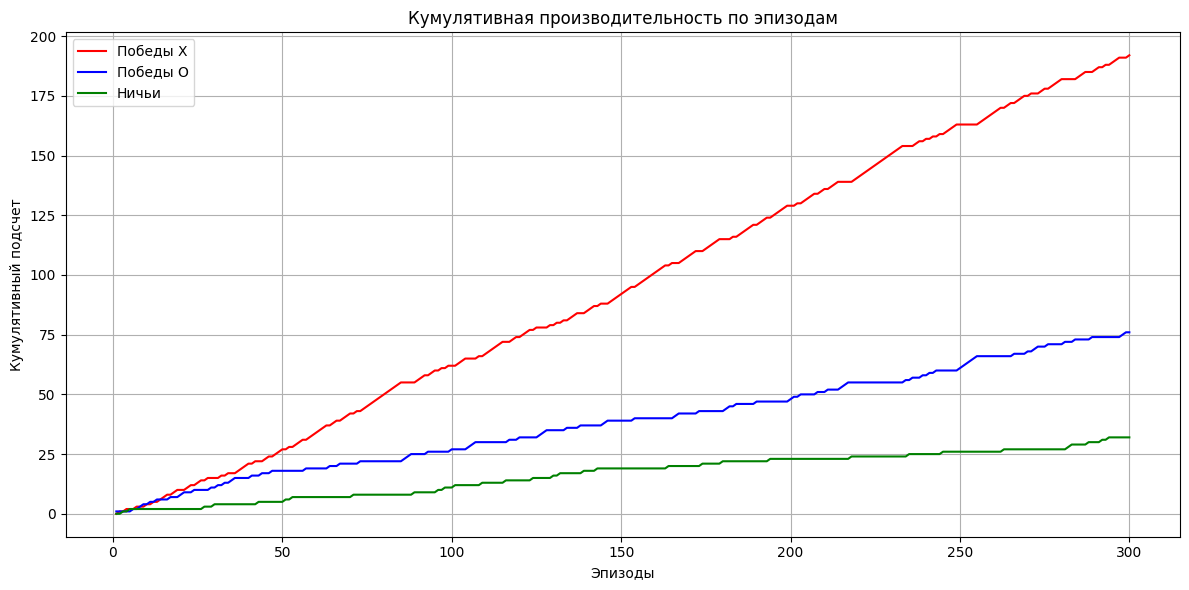

In [ ]:
import matplotlib.pyplot as plt


# Построение кумулятивного графика
plt.figure(figsize=(12, 6))

episodes_range = statistics["Episode"]
wins_X = np.cumsum(statistics["Wins_X"])
wins_O = np.cumsum(statistics["Wins_O"])
draws = np.cumsum(statistics["Draws"])

plt.plot(episodes_range, wins_X, label="Победы X", color="red")
plt.plot(episodes_range, wins_O, label="Победы O", color="blue")
plt.plot(episodes_range, draws, label="Ничьи", color="green")

plt.xlabel("Эпизоды")
plt.ylabel("Кумулятивный подсчет")
plt.title("Кумулятивная производительность по эпизодам")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()